### **Introduction:**

The following code presents a comprehensive analysis of Twitter data pertaining to the Ukraine-Russia war, focusing on sentiment analysis using Python. Leveraging various libraries such as pandas, nltk, seaborn, matplotlib, and wordcloud, this analysis provides valuable insights into the sentiments expressed by users regarding the ongoing conflict.

The code begins by loading the dataset, which contains information about usernames, tweets, and languages. Following data loading, it performs initial exploratory data analysis, including checking for missing values and visualizing the distribution of tweet languages.

Next, the text data undergoes preprocessing to prepare it for sentiment analysis. This includes tasks such as lowercasing, removal of stopwords, punctuation, URLs, and numeric characters, as well as stemming using the SnowballStemmer from the NLTK library.

Once the text is cleaned, sentiment analysis is performed using the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analyzer. Sentiment scores for positive, negative, and neutral sentiments are calculated for each tweet.

The code further segregates tweets based on their sentiment scores, generating word clouds to visually represent the most frequent words in tweets associated with positive and negative sentiments, respectively.

Overall, this analysis offers a deeper understanding of public sentiment surrounding the Ukraine-Russia conflict on Twitter, shedding light on prevailing sentiments and trends within the online discourse.

### **Initializing Libraries and Loading Data**

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

data = pd.read_csv("filename.csv")

### **Exploring the Dataset: First Few Rows**

In [88]:
data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1609713284629807105,1609713284629807105,2023-01-02 00:48:48 UTC,2023-01-02,00:48:48,0,1222975145977040896,gabimartinsa,Gabi,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1609713284113907714,1609708650259677185,2023-01-02 00:48:48 UTC,2023-01-02,00:48:48,0,1577723797561643032,petadactyl,Dactyl,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Chaleck', 'name': '🌻Check In...",NaN,NaN,NaN,NaN
2,1609713280171253760,1609667082261512194,2023-01-02 00:48:47 UTC,2023-01-02,00:48:47,0,1608106109247651843,valetaizong,Vale L'italiana,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'NYCyrano', 'name': 'NYCyrano...",NaN,NaN,NaN,NaN
3,1609713279945019392,1609650672823140352,2023-01-02 00:48:47 UTC,2023-01-02,00:48:47,0,1603803888578138112,yieldingperry,Perry Yielding,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Brav0s', 'name': 'Brandon de...",NaN,NaN,NaN,NaN
4,1609713274911875077,1609713274911875077,2023-01-02 00:48:46 UTC,2023-01-02,00:48:46,0,1534540191498547200,jackcouteau,Jack Couteau 🇺🇦,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


### **Inspecting Dataset Structure: Column Names**

In [89]:
print(data.columns)

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')


### **Selecting Relevant Columns: Username, Tweet, Language**

In [90]:
data = data[["username", "tweet", "language"]]
data

,username,tweet,language
0,gabimartinsa,Posse do Lula juntou representantes da Rússia ...,pt
1,petadactyl,@Chaleck Over more than Taiwan. They hate The...,en
2,valetaizong,@NYCyrano @ladyonorato @VeraVanHorne Questo è ...,it
3,yieldingperry,@Brav0s @DailyCaller Russia wont even own Russ...,nl
4,jackcouteau,Russia is a terrorist state. Russia must be ex...,en
...,...,...,...
10000,italian347,How does a group found in *checks notes* Turke...,en
10001,davidmc16224113,@Talanio18T @olgatokariuk Historic border- se...,en
10002,alichemist15,@fosatb007 @Truth_Z_ What have you done to hel...,en
10003,qasim199028,Here is all you need to know about Russia’s di...,en


### **Checking for Missing Values in Selected Columns**

In [91]:
data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

### **Visualizing Language Distribution in Tweets**

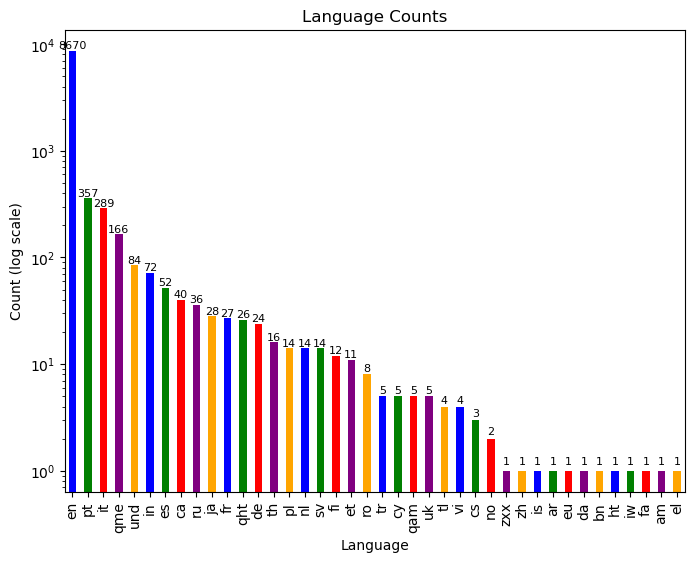

In [92]:
language_counts = data["language"].value_counts()

fig, ax = plt.subplots(figsize=(8, 6))

colors = ['blue', 'green', 'red', 'purple', 'orange']

language_counts.plot(kind='bar', color=colors, ax=ax)

for i, v in enumerate(language_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)

ax.set_xlabel('Language')
ax.set_ylabel('Count (log scale)')
ax.set_yscale('log')  # Set log scale on y-axis
ax.set_title('Language Counts')

plt.show()

### **Text Cleaning and Preprocessing Function**

In [93]:
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

### **Generating Word Cloud from Cleaned Tweets**

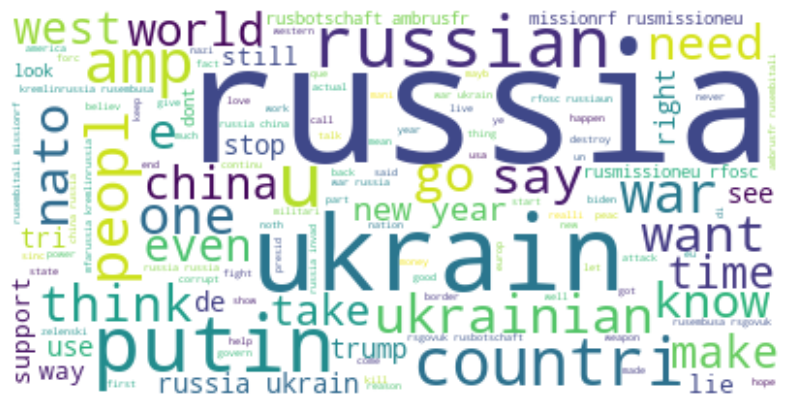

In [94]:
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### **Performing Sentiment Analysis and Adding Scores**

In [95]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet", "Positive", "Negative", "Neutral"]]
data.head()

,tweet,Positive,Negative,Neutral
0,poss lula juntou representant da rússia e ucrâ...,0.0,0.000,1.000
1,chaleck taiwan hate west work russia plan des...,0.0,0.507,0.493
2,nycyrano ladyonorato veravanhorn questo è il n...,0.0,0.000,1.000
3,dailycal russia wont even russia month,0.0,0.000,1.000
4,russia terrorist state russia must expel un se...,0.0,0.352,0.648


### **Generating Word Cloud for Positive Sentiment Tweets**

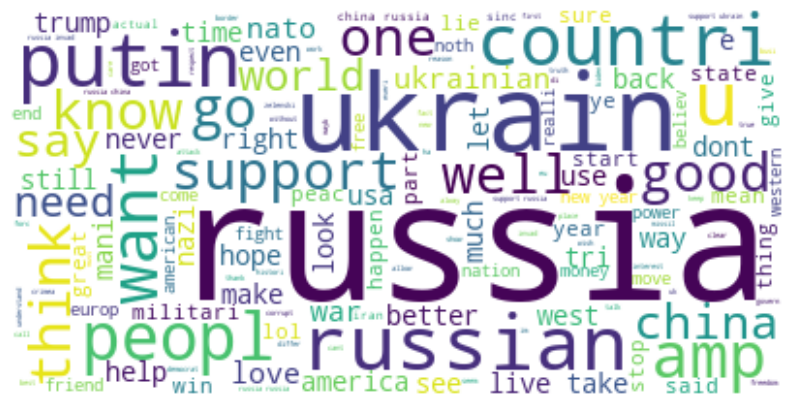

In [96]:
positive =' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### **Generating Word Cloud for Negative Sentiment Tweets**

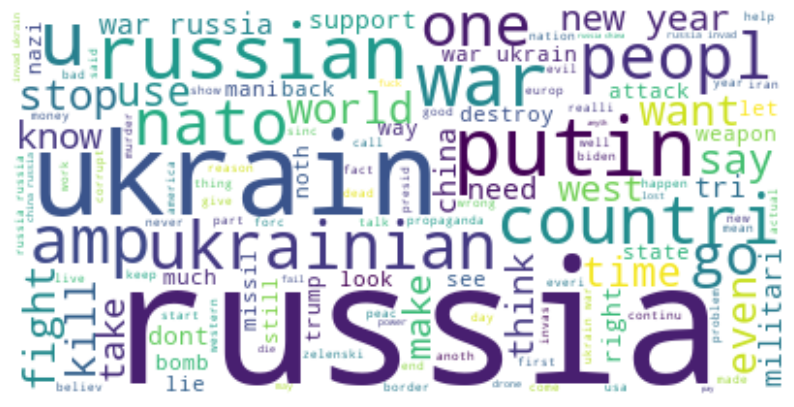

In [97]:
negative =' '.join([i for i in data['tweet'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()